In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pandas.tseries.offsets import Day
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

## PREPROCESSING

### *Read Data*

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
baseurl = '/content/gdrive/MyDrive/'
train_url = baseurl + 'train_fktp (1).csv'


Mounted at /content/gdrive


In [ ]:
train_df = pd.read_csv(train_url, sep=',')

#train_df = pd.read_csv(r"C:\Users\Robby\Downloads\BDC\train_fktp.csv", sep=',')

In [ ]:
train_df.head(5)

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,4,1,12.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,2,1,1.0,4,773,K29,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,1,1,3.0,4,1757,Z30,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,4,1,1.0,5,621,I10,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,4,1,1.0,1,622,I11,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat


In [ ]:
train_df.dtypes

PSTV01        float64
PSTV02          int64
PSTV15        float64
FKP02          object
FKP03          object
FKP04          object
FKP05           int64
FKP06           int64
FKP07           int64
FKP08           int64
FKP09           int64
FKP10           int64
FKP11         float64
FKP12           int64
FKP14           int64
FKP14A         object
FKP15          object
FKP15A         object
FKP16           int64
FKP17           int64
FKP18           int64
FKP19           int64
FKP20           int64
FKP21           int64
FKP22           int64
FKP13Class     object
dtype: object

In [ ]:
train_df.shape

(4056898, 26)

In [ ]:
#mengambil semua baris pada 'train_df' yang mengandung nilai '449590620P000054' pada setidaknya satu kolom.
train_df[train_df.eq('449590620P000054').any(1)]

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,2,1,1.0,4,773,K29,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat


### *Check Unique & Missing*

In [ ]:
# menampilkan frekuensi data di masing - masing kolom
p1 = []
for col in train_df.columns:
  p1.append( train_df[col].value_counts() )

p1

[100846584.0    248
 60566306.0     235
 37301192.0     210
 48600054.0     206
 73374830.0     196
               ... 
 190005805.0      1
 8365752.0        1
 12585271.0       1
 236919998.0      1
 24766757.0       1
 Name: PSTV01, Length: 832023, dtype: int64, 64538089     515
 18145538     450
 94097905     434
 37301192     416
 47460939     414
             ... 
 154212952      1
 284949120      1
 222409154      1
 104975497      1
 44813505       1
 Name: PSTV02, Length: 438280, dtype: int64, 1.050523      60615
 1.260627       9537
 1.155575       9434
 1.470732       7970
 1.575784       7930
               ...  
 343.404755        1
 209.167953        1
 41.534210         1
 175.735001        1
 132.904984        1
 Name: PSTV15, Length: 50390, dtype: int64, 958073632           1
 259320919P000811    1
 804269476           1
 387880120P000493    1
 349651019P002103    1
                    ..
 30060219P000030     1
 1326480344          1
 1121180537          1
 319090320P00

In [ ]:
# check NaN
# terdapat 1 NaN di FKP11 & 1.380.241 FKP14A
train_df.isnull().sum()

PSTV01              0
PSTV02              0
PSTV15              0
FKP02               0
FKP03               0
FKP04               0
FKP05               0
FKP06               0
FKP07               0
FKP08               0
FKP09               0
FKP10               0
FKP11               1
FKP12               0
FKP14               0
FKP14A        1380241
FKP15               0
FKP15A              0
FKP16               0
FKP17               0
FKP18               0
FKP19               0
FKP20               0
FKP21               0
FKP22               0
FKP13Class          0
dtype: int64

In [ ]:
# terdapat 1 NaN di FKP11
train_df.loc[train_df.FKP11.isna()]

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
1048800,53499334.0,177329885,184.99704,1237961348,2020-05-20,2020-05-20,35,3509,3,1,4,1,NaN,3,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat


### *Solving Missing Value*

In [ ]:
# Filling NaN using 999
train_df = train_df.fillna(9999)

In [ ]:
#train_df = train_df.fillna(0)

In [ ]:
train_df.head()

In [ ]:
# check NaN Value again, there is nothing NaN again in dataframe
train_df.isnull().sum()

### *Create Duration Column Based on FKP03 & FKP04*

In [ ]:
#Fungsi untuk mengubah data ke format datetime
#def to_dt(train_df, FKP03, FKP04):
  #  return pd.to_datetime(train_df['FKP03, FKP04'], infer_datetime_format = True)

In [ ]:
# change dtypes to datetimes
train_df['FKP03']=pd.to_datetime(train_df.FKP03)
train_df['FKP04']=pd.to_datetime(train_df.FKP04)

In [ ]:
# create duration variable
train_df['DURASI'] = (train_df['FKP04'].sub(train_df['FKP03']).mod(365*Day()).dt.days) +1

In [ ]:
train_df.head(2)

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class,DURASI
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,4,1,12.0,2,9999,9999,9999,9999,98,9998,98,98,98,98,2,Sehat,1
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,2,1,1.0,4,773,K29,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat,1


In [ ]:
# rearrange a bit

# train_df.columns.values
cols = ['PSTV01', 'PSTV02', 'DURASI','PSTV15', 'FKP02', 'FKP03', 'FKP04', 'FKP05',
       'FKP06', 'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12',
       'FKP14', 'FKP14A', 'FKP15', 'FKP15A', 'FKP16', 'FKP17', 'FKP18',
       'FKP19', 'FKP20', 'FKP21', 'FKP22', 'FKP13Class']

train_df = train_df[cols]

### *Drop Variable*

In [ ]:
# drop column
fkp02 = train_df[['FKP02']]
train_df = train_df.drop(['PSTV01', 'PSTV02', 'FKP02', 'FKP03', 'FKP04', 'FKP07', 'FKP15A'], axis=1)

### *Split Features into numerical and Categorical*

In [ ]:
num = train_df.select_dtypes(include = 'number')

In [ ]:
char = train_df.select_dtypes(include = 'object')

### *Handling Outliers*

In [ ]:
num.describe( percentiles= [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.9, 0.99])

In [ ]:
# capping & flooring method
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [ ]:
# solving outliers
num = num.apply( lambda x : outlier_cap(x) )

In [ ]:
# check outliers again
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

In [ ]:
num.head(2)

### *Encoding Categorical Variable*

In [ ]:
char.dtypes

FKP14A        object
FKP15         object
FKP13Class    object
dtype: object

In [ ]:
# using label encoder at object variable ( fkp14 & fkp15a)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col_list = char.select_dtypes(include = "object").columns
for colsn in col_list:
    char[colsn] = le.fit_transform(char[colsn].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
char.head()

### *Create Master Set for Model Development*

In [ ]:
# combine num & char
train_df_final = pd.concat([num,char],axis=1, join='inner')

In [ ]:
train_df_final.head(2)

,DURASI,PSTV15,FKP05,FKP06,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP14A,FKP15,FKP13Class
0,1.0,20.064983,61.0,6108.0,1.0,4.0,1,12.0,2,9999.0,98.0,9998.0,98.0,98,98.0,98,2,0,0,1
1,1.0,2.626307,51.0,5171.0,3.0,2.0,1,1.0,4,773.0,98.0,9998.0,98.0,98,98.0,98,1,781,3609,0


### *Define Target & Independent Feature*

In [ ]:
# defining target & independent feature

Y = train_df_final[['FKP13Class']]
X = train_df_final.drop(['FKP13Class'], axis=1)

In [ ]:
Y.mean()

### *Feature Scalling*

In [ ]:
# standarization

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_std = std.transform(X)

### *PCA*

In [ ]:
# Building Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components = 19)
pca.fit(X_std)
PC = pca.transform(X_std)

In [ ]:
# cummulative variance explained ratio
cum_var_exp = pca.explained_variance_ratio_
np.cumsum(cum_var_exp)

array([0.3646913 , 0.58907187, 0.70197393, 0.78762609, 0.84425058,
       0.89127262, 0.92907555, 0.96372043, 0.99244281, 0.99826387,
       0.99952498, 0.99982183, 0.99996109, 0.99998985, 0.99999636,
       0.99999929, 0.99999992, 1.        , 1.        ])

In [ ]:
# create df based on PCA

PC_df = pd.DataFrame( data = PC,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19'])

In [ ]:
# Combine PCA df with target variable
X_PCA_Target = pd.concat( [PC_df, Y], axis=1)

Text(0.5, 0, 'PC2')

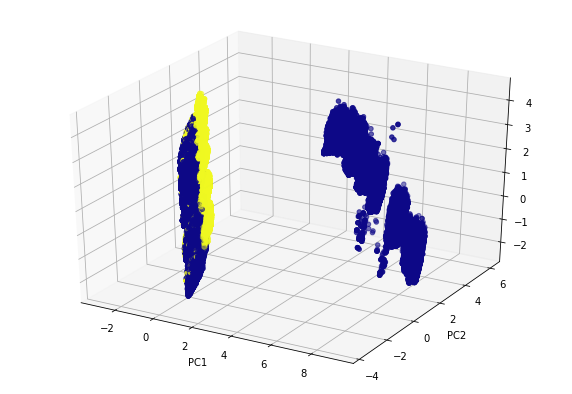

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(PC[:,0],PC[:,1],PC[:,2], c=X_PCA_Target['FKP13Class'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)

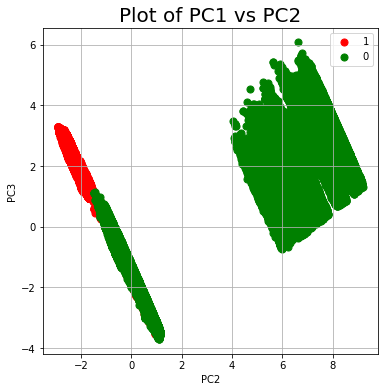

In [ ]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

ax.set_title('Plot of PC2 vs PC3', fontsize = 20)

targets = [1, 0] # 1 = sehat & 0 = belum_sehat

colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = X_PCA_Target['FKP13Class'] == target
    ax.scatter(X_PCA_Target.loc[indicesToKeep, 'PC2']
               , X_PCA_Target.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

## BUILD MACHINE LEARNING

### *Train Test Split*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PC, Y, test_size=0.3, random_state=42)

In [ ]:
print('Shape of training data', X_train.shape)
print('Shape of test data', X_test.shape)

print(" ")

print('Event Rate in Trainig Data', y_train.mean())
print('EventRate in Test Data', y_test.mean())

Shape of training data (2839828, 19)
Shape of test data (1217070, 19)
 
Event Rate in Trainig Data FKP13Class    0.35061
dtype: float64
EventRate in Test Data FKP13Class    0.350608
dtype: float64


### *Decision Tree*

In [ ]:
# random_state = 42, we use the same number as like train test split
# max_depth 4 = because we want the tree doesnt become deep

from sklearn.tree import DecisionTreeClassifier


dtree=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn import tree
import pydotplus

In [ ]:
# filled = True, We do want values in the nodes to be filled out
# rounded =True, We want the edges of the nodes or the terminal loads to be rounded and not sharp

import matplotlib.pyplot as plt
plt.figure(figsize=(60,10))
#_ = tree.plot_tree(regr, feature_names=X_all.columns, filled=True)
tree.plot_tree(dtree,filled=True,rounded=True,feature_names=train_df_final.columns,fontsize=15)
plt.show

### *Extracting Feature Importance based on decision tree*

In [ ]:
import pandas as pd
feature_importances=pd.DataFrame(dtree.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [ ]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

## MODEL EVALUATION

In [ ]:
y_pred_dtree=dtree.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
# calculated using respective function

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree))
print("Precision",metrics.precision_score(y_test,y_pred_dtree))
print("Recall",metrics.recall_score(y_test,y_pred_dtree))
print("f1_score",metrics.f1_score(y_test,y_pred_dtree))

Accuracy: 0.9976944629314666
Precision 0.9996840941399463
Recall 0.9937382093434728
f1_score 0.9967022841911782


C:\Users\Robby\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


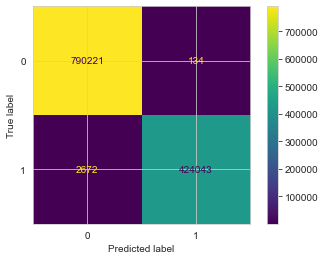

In [ ]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

##### The Result Telling Us:
 * we have 790.223 + 424.042 = 1.214.216 correct predictions
 * we have 2673 + 132 = 2.805 incorrect predictions

## MODEL EVALUATION - PART 2

In [ ]:
# menghitung prediksi based on probability

y_pred_prob = dtree.predict_proba(PC)[:, 1]
train_df_final['pred_prob']=pd.DataFrame(y_pred_prob)
train_df_final['FKP02'] = pd.DataFrame(fkp02)

In [ ]:
train_df_final.head(2)

,DURASI,PSTV15,FKP05,FKP06,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP14A,FKP15,FKP13Class,pred_prob,FKP02
0,1.0,20.064983,61.0,6108.0,1.0,4.0,1,12.0,2,9999.0,98.0,9998.0,98.0,98,98.0,98,2,0,0,1,1.0,958073632
1,1.0,2.626307,51.0,5171.0,3.0,2.0,1,1.0,4,773.0,98.0,9998.0,98.0,98,98.0,98,1,781,3609,0,0.0,449590620P000054


In [ ]:
# binning to 10 rank, based on pred prob value
# +1 memastikan bahwa untuk setiap peringkat, jumlah pengamatan ( observation ) di setiap rank itu sama
# method='first' to have python assign a unique rank to all your records. If there is a duplicate value (i.e. a tie in the rank), this method will choose the first record it comes to and rank in that order.

train_df_final['P_Rank_dtree']=pd.qcut(train_df_final['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
train_df_final[['pred_prob','P_Rank_dtree']]

### *Feature Selection*

In [ ]:
# remove feature with 0 variance -> kolom durasi hilang

from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold()
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]
num_1.iloc[0]

#### feature discreatization

In [ ]:
# feature discreatization
# quantile = Each bin has the same number of values, split based on percentiles

from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')

In [ ]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="FKP13Class",data=X_bin_combined, estimator=mean )
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2,k=10)
selector.fit_transform(num, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]
select_features_df_num.head(2)

# DATA TEST

In [ ]:
#from google.colab import drive

#drive.mount('/content/gdrive')
#baseurl = '/content/gdrive/MyDrive/'
#test_url = baseurl + 'test_fktp.csv'

In [ ]:
#test_df = pd.read_csv(test_url, sep=',')
test_df = pd.read_csv(r"C:\Users\Robby\Downloads\BDC\test_fktp.csv", sep=',')

C:\Users\Robby\AppData\Local\Temp\ipykernel_17616\2871469415.py:2: DtypeWarning: Columns (3,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(r"C:\Users\Robby\Downloads\BDC\test_fktp.csv", sep=',')


In [ ]:
test_df.head(2)

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,1,1,13,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,3,1,12,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN


In [ ]:
test_df.shape

(1014225, 26)

In [ ]:
# training kernel svm
#from sklearn.svm import SVC

#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train, y_train)

### *Drop and Save FKP13Class*

In [ ]:
fkp13 = test_df['FKP13Class']
fkp13.shape

(1014225,)

In [ ]:
test_df = test_df.drop (['FKP13Class'], axis=1)

### *Filling NaN using 9999*

In [ ]:
# Filling NaN using 999
test_df = test_df.fillna(9999)

### *Create Duration Column Based on FKP03 & FKP04*

In [ ]:
# change dtypes to datetimes
test_df['FKP03']=pd.to_datetime(test_df.FKP03)
test_df['FKP04']=pd.to_datetime(test_df.FKP04)

In [ ]:
# create duration variable
test_df['DURASI'] = (test_df['FKP04'].sub(test_df['FKP03']).mod(365*Day()).dt.days) +1

In [ ]:
# rearrange a bit

# train_df.columns.values
cols = ['PSTV01', 'PSTV02', 'DURASI','PSTV15', 'FKP02', 'FKP03', 'FKP04', 'FKP05',
       'FKP06', 'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12',
       'FKP14', 'FKP14A', 'FKP15', 'FKP15A', 'FKP16', 'FKP17', 'FKP18',
       'FKP19', 'FKP20', 'FKP21', 'FKP22']

test_df = test_df[cols]

### *Drop Variabel*

In [ ]:
# drop column

fkp02 = test_df['FKP02']

test_df = test_df.drop(['PSTV01', 'PSTV02', 'FKP02', 'FKP03', 'FKP04', 'FKP07', 'FKP15A'], axis=1)

In [ ]:
test_df.shape

(1014225, 20)

### *Add FKP13Class again*

In [ ]:
test_df = pd.concat([test_df,fkp13],axis=1, join='inner')

In [ ]:
test_df.head(2)

,DURASI,PSTV15,FKP05,FKP06,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,1,240.884842,31,3172,2,1,1,13,5,9999,9999,9999,98,9998,98,98,98,98,2,NaN
1,1,47.378571,17,1705,1,3,1,12,2,9999,9999,9999,98,9998,98,98,98,98,2,NaN


# *Split Features into numerical and Categorical*

In [ ]:
num2 = test_df.select_dtypes(include = 'number')
char2 = test_df.select_dtypes(include = 'object')

In [ ]:
num2.head(2)

,DURASI,PSTV15,FKP05,FKP06,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,1,240.884842,31,3172,2,1,1,13,5,9999,98,9998,98,98,98,98,2,NaN
1,1,47.378571,17,1705,1,3,1,12,2,9999,98,9998,98,98,98,98,2,NaN


In [ ]:
char2.head(2)

,FKP14A,FKP15
0,9999,9999
1,9999,9999


# *Handling Outliers*

In [ ]:
num.describe( percentiles= [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.9, 0.99])

In [ ]:
# capping & flooring method
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [ ]:
# solving outliers
num2 = num2.apply( lambda x : outlier_cap(x) )

In [ ]:
# check outliers again
num2.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

### *Encoding Categorical Variable*

In [ ]:
# using label encoder at object variable ( fkp14 & fkp15a)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col_list = char2.select_dtypes(include = "object").columns
for colsn in col_list:
    char2[colsn] = le.fit_transform(char2[colsn].astype(str))

In [ ]:
char2.dtypes

# Create Master Set for Model Development

In [ ]:
# combine num & char
test_df_final = pd.concat([num2,char2],axis=1, join='inner')

In [ ]:
test_df_final.head(2)

,DURASI,PSTV15,FKP05,FKP06,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class,FKP14A,FKP15
0,1.0,240.884842,31.0,3172.0,2.0,1.0,1,13.0,5,9999.0,98.0,9998.0,98.0,98,98.0,98,2,NaN,0,0
1,1.0,47.378571,17.0,1705.0,1.0,3.0,1,12.0,2,9999.0,98.0,9998.0,98.0,98,98.0,98,2,NaN,0,0


### *Define Target & Independent Feature*

In [ ]:
# defining target & independent feature

Y2 = test_df_final[['FKP13Class']]
X2 = test_df_final.drop( ['FKP13Class'], axis = 1)

### *Feature Scalling*

In [ ]:
# standarization

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X2)
X2_std = std.transform(X2)

In [ ]:
X2_std.shape

(1014225, 19)

In [ ]:
Y2.head(2)

,FKP13Class
0,NaN
1,NaN


In [ ]:
#dtree=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)
#dtree.fit(X_train,y_train)

### *PCA*

In [ ]:
# Building Principal Components
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 19)
pca2.fit(X2_std)
PC2 = pca2.transform(X2_std)

In [ ]:
# cummulative variance explained ratio
cum_var_exp2= pca.explained_variance_ratio_
np.cumsum(cum_var_exp2)

array([0.3646913 , 0.58907187, 0.70197393, 0.78762609, 0.84425058,
       0.89127262, 0.92907555, 0.96372043, 0.99244281, 0.99826387,
       0.99952498, 0.99982183, 0.99996109, 0.99998985, 0.99999636,
       0.99999929, 0.99999992, 1.        , 1.        ])

In [ ]:
# create df based on PCA

PC_df2 = pd.DataFrame( data = PC2,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19'])

In [ ]:
# Combine PCA df with target variable
X_PCA_Target2 = pd.concat( [PC_df2, Y2], axis=1)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(PC[:,0],PC[:,1],PC[:,2], c=X_PCA_Target['FKP13Class'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)

## TEST MODEL

### *Testing*

In [ ]:
y_pred_dtree2=dtree.predict(X2)

NameError: ignored

In [ ]:
test_df_final['FKP13Class'] = pd.DataFrame(y_pred_dtree2)
test_df_final['FKP02'] = pd.DataFrame(fkp02)

In [ ]:
test_df_final[['FKP02','FKP13Class']]

,FKP02,FKP13Class
0,954386050,1
1,774246805,1
2,1202010273,1
3,1286640248,1
4,1285179242,1
...,...,...
1014220,248870919P000406,1
1014221,116000620P000034,1
1014222,160421019P000631,1
1014223,332670919P000083,1


In [ ]:
test_df_final['FKP13Class'].value_counts()

1    1001067
0      13158
Name: FKP13Class, dtype: int64

In [ ]:
# calculated using respective function

print("Accuracy:",metrics.accuracy_score(Y2, y_pred_dtree2))
print("Precision",metrics.precision_score(Y2,y_pred_dtree2))
print("Recall",metrics.recall_score(Y2,y_pred_dtree2))
print("f1_score",metrics.f1_score(Y2,y_pred_dtree2))

In [ ]:
# menghitung prediksi based on probability

y_pred_prob2 = dtree.predict_proba(PC2)[:, 1]
test_df_final['pred_prob']=pd.DataFrame(y_pred_prob)

In [ ]:
test_df_final.head(2)

,DURASI,PSTV15,FKP05,FKP06,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class,FKP14A,FKP15,FKP02,pred_prob
0,1.0,240.884842,31.0,3172.0,2.0,1.0,1,13.0,5,9999.0,98.0,9998.0,98.0,98,98.0,98,2,1,0,0,954386050,1.0
1,1.0,47.378571,17.0,1705.0,1.0,3.0,1,12.0,2,9999.0,98.0,9998.0,98.0,98,98.0,98,2,1,0,0,774246805,0.0


In [ ]:
test_df_final['pred_prob'].value_counts()

### *K Fold*

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.77 %
Standard Deviation: 0.01 %
